# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapezoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [1]:
#your import cell
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib notebook

Now we can define our integration algorithms

In [2]:
#define midpoint rule
def riemann_sum_midpoint(f,xmin,xmax,n_part):
    '''Approximates integral using Riemann sum of the midpoint.
       Takes the function f(x),
                  intitial x position, xmin,
                   final x position, xmax,
                   and number of partitions, n_part
                   as arguments'''
    dx = (xmax - xmin)/float(n_part)
    area = 0
    for i in range (0,n_part):
        area += dx*f(xmin + (i+(1/2))*dx)
    return area

In [3]:
#define trapezoidal rule
def trapezoidal_rule(f,xmin,xmax,n_part):
    '''Approximates integral using trapezoidal rule.
       Takes the function f(x),
                  intitial x position, xmin,
                   final x position, xmax,
                   and number of partitions, n_part
                   as arguments'''
    dx = (xmax - xmin)/float(n_part)
    area = f(xmin)+f(xmax)
    for i in range (1,n_part):
        area += 2*f(xmin+i*dx)
    area *= dx/2
    return area

In [4]:
#define simpson's rule
def simpsons_rule(f,xmin,xmax,n_part):
    '''Approximates integral using simpson's rule.
       Takes the function f(x),
                  intitial x position, xmin,
                   final x position, xmax,
                   and number of partitions, n_part
                   as arguments'''
    if n_part % 2 != 0:
        return 'Invalid n_part'
    dx = (xmax - xmin)/float(n_part)
    area = f(xmin)+f(xmax)
    for i in range (1,n_part):
        if i % 2 == 0:
            area += 2*f(xmin+i*dx)
        else:
            area += 4*f(xmin+i*dx)
    area *= dx/3
    return area

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

Test them with numbers that we know the answer to

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Yes. Electric field line charges have this integral.

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [5]:
#exact solution to the integral
exact_sol = 2**(-3/2)

In [6]:
#solve the integral using your integration functions
f = lambda x : 2/((4+x**2)**(3/2))
a = 0
b = 2
partitions = 6

riemann_sol = riemann_sum_midpoint(f, a, b, partitions)
trape_sol = trapezoidal_rule(f, a, b, partitions)
simp_sol = simpsons_rule(f, a, b, partitions)

Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [7]:
#scipy integration
x = np.linspace(a,b,partitions+1)
y = f(x)

sp_integrate_trap = integrate.trapz(y,x)
sp_integrate_simp = integrate.simps(y,x)

# Question
How do scipy integrals compare to yours? Support your answer. 

My integrals are the same as the scipy ones. For both the trapzoidal and simpson's methods I got the same results as scipy did.

In [8]:
#print the numerical values
print('The exact solution is {}'.format(exact_sol))
print('Riemann Midpoint Solution is {}'.format(riemann_sol))
print('Trapezoidal Solution is {}'.format(trape_sol))
print('Simpson\'s Solution is {}'.format(simp_sol))
print('Scipy has the trapzoidal solution as {}'.format(sp_integrate_trap))
print('Scipy has Simpson\'s solution as {}'.format(sp_integrate_simp))

The exact solution is 0.3535533905932738
Riemann Midpoint Solution is 0.3538599754585315
Trapezoidal Solution is 0.35293994641413146
Simpson's Solution is 0.3535517906244493
Scipy has the trapzoidal solution as 0.35293994641413146
Scipy has Simpson's solution as 0.35355179062444925


Numerically compare your midpoint, trapezoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [9]:
#numerical comparisons
mid_error = (riemann_sol-exact_sol)/exact_sol
trapezoid_error = (trape_sol-exact_sol)/exact_sol
simp_error = (simp_sol-exact_sol)/exact_sol
print('The Midpoint error is {}'.format(mid_error))
print('The Trapezoidal Rule error is {}'.format(trapezoid_error))
print('Simpson\'s Rule error is {}'.format(simp_error))

The Midpoint error is 0.0008671529489315273
The Trapezoidal Rule error is -0.0017350821558038288
Simpson's Rule error is -4.5253952219184745e-06


# Question
Which method provides the best approximation to the exact solution?

Simpson's Rule provides the best approximation.

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapezoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

<IPython.core.display.Javascript object>


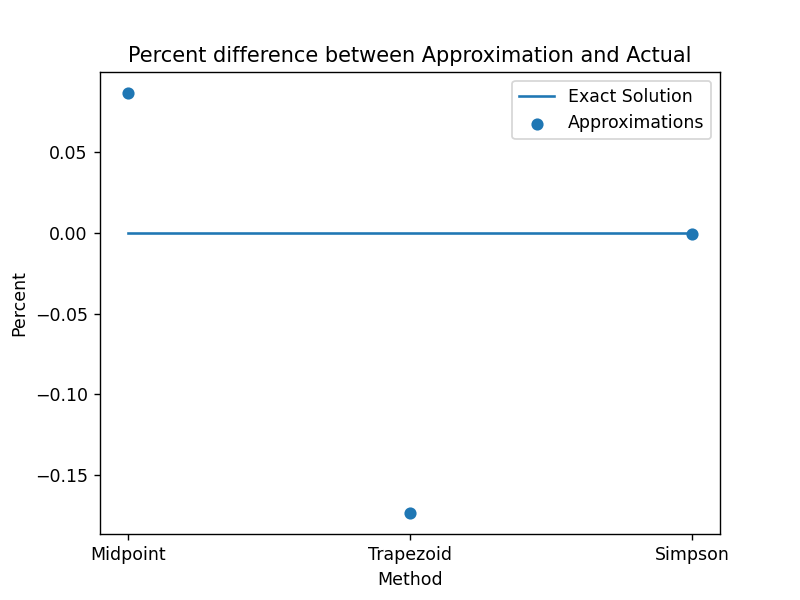

In [10]:
#plot
x = ['Midpoint', 'Trapezoid', 'Simpson']
plt.scatter(x, [100*mid_error, 100*trapezoid_error, 100*simp_error])
plt.plot(x, [0,0,0])
plt.title('Percent difference between Approximation and Actual')
plt.xlabel('Method')
plt.ylabel('Percent')
plt.legend(['Exact Solution', 'Approximations']);

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [11]:
#solve integral above

f2 = lambda x : math.e**-x**2

quad_sol = integrate.quad(f2,-np.inf,np.inf)

print('The solution is {}'.format(quad_sol[0]))

The solution is 1.772453850905516


# Question
If you square your solution, does the resulting number have any special meaning?

Yes. The squared value is π